In [1]:
import numpy
import numpy as np
import pandas as pd
import sys, glob
import urllib3
import h5py
import cdsapi, zipfile, os, time
sys.path.append(os.getcwd()+'/../cds-backend/code/')
import cds_eua3 as eua
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10),
         'axes.labelsize': 20,
         'axes.titlesize': 24,
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

In [3]:
fn = glob.glob('/raid60/scratch/uli/converted_test/*.nc')[0]
with eua.CDMDataset(fn) as test:
    print(test)
    print(test.observations_table)
    aa = test.to_dataframe(groups=['observations_table'], variables=['z_coordinate', 'date_time', 'observed_variable', 'observation_value', 'conversion_flag', 'conversion_method', 'source_id'])

2021-01-18 08:48:54,444 - upperair.cdm | __init__ - DEBUG - [OPEN] /raid60/scratch/uli/converted_test/0-20000-0-01384_CEUAS_merged_v0.nc
File: <HDF5 file "0-20000-0-01384_CEUAS_merged_v0.nc" (mode r)>
Filename: /raid60/scratch/uli/converted_test/0-20000-0-01384_CEUAS_merged_v0.nc
(G)roups/(V)ariables: 

 - G | crs__________________________________________ : : 4
 - V | dateindex____________________________________ : : (19584,)
 - G | header_table_________________________________ : : 55
 - G | observations_table___________________________ : : 50
 - G | observed_variable____________________________ : : 9
 - G | recordindices________________________________ : : 18
 - G | sensor_configuration_________________________ : : 12
 - G | source_configuration_________________________ : : 2
 - G | station_configuration________________________ : : 47
 - G | station_configuration_codes__________________ : : 7
 - G | station_type_________________________________ : : 4
 - G | units______________________

In [4]:
display(aa)

,z_coordinate,date_time,observed_variable,observation_value,conversion_flag,conversion_method,source_id
0,NaN,1949-01-03 02:00:00,0,95700.000000,-2147483648,-2147483648,era5_1759
1,NaN,1949-01-03 02:00:00,0,95700.000000,-2147483648,-2147483648,era5_1759
2,NaN,1949-01-04 03:00:00,0,97000.000000,-2147483648,-2147483648,era5_1759
3,NaN,1949-01-04 03:00:00,0,97000.000000,-2147483648,-2147483648,ncar
4,NaN,1949-01-16 02:00:00,0,98700.000000,-2147483648,-2147483648,era5_1759
...,...,...,...,...,...,...,...
6386086,99600.0,2001-03-27 06:00:00,140,-0.984808,-2147483648,-2147483648,era5_1
6386087,99400.0,2001-03-28 06:00:00,140,-1.969615,-2147483648,-2147483648,era5_1
6386088,98800.0,2001-03-29 06:00:00,140,-2.000000,-2147483648,-2147483648,era5_1
6386089,98100.0,2001-03-30 06:00:00,140,-2.819078,-2147483648,-2147483648,era5_1


In [5]:
numpy.array(aa.source_id.drop_duplicates()).flatten()

array(['era5_1759', 'ncar', 'era5_2', 'igra2', 'era5_1', 'era5_1761'],
      dtype=object)

---
---

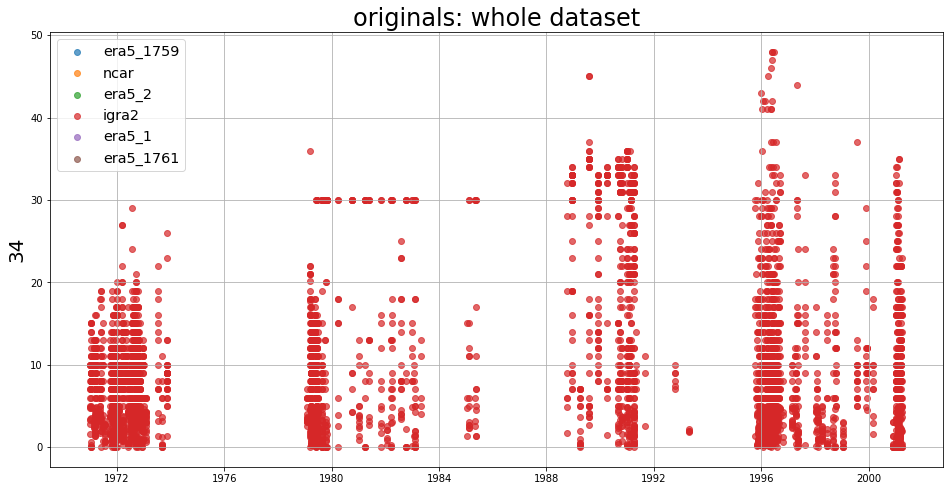

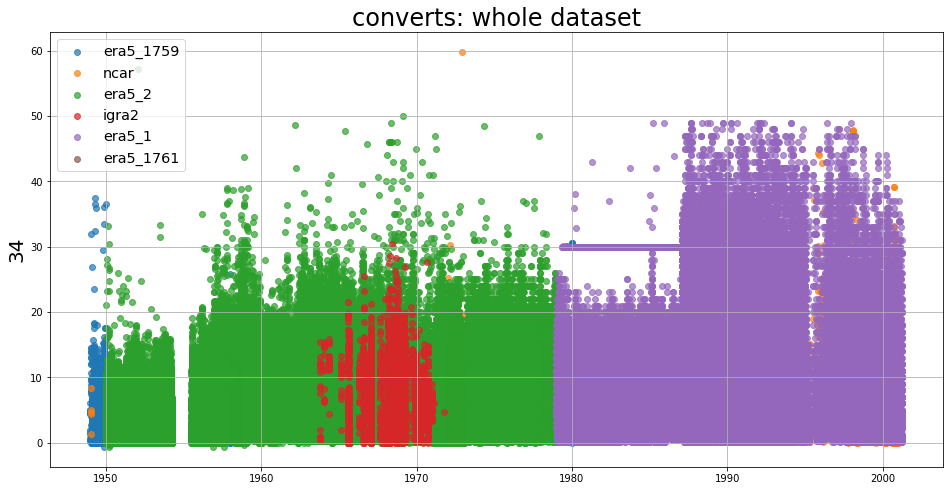

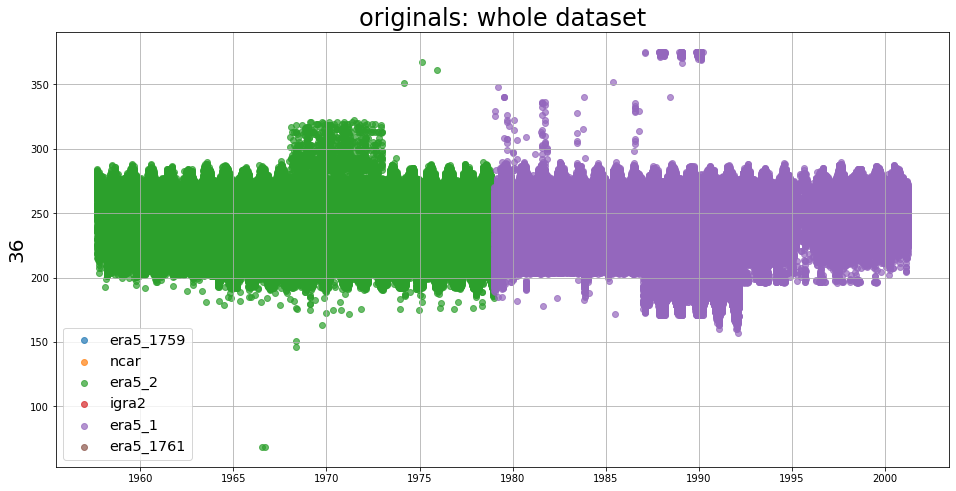

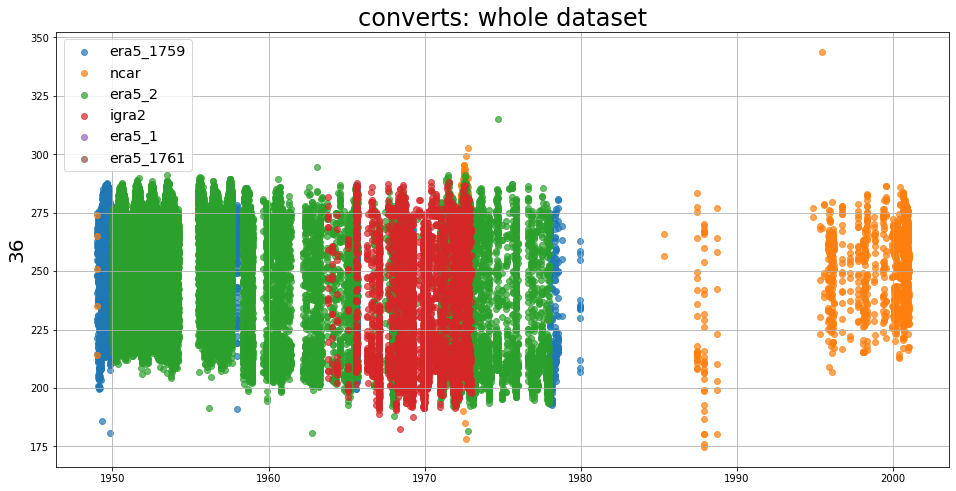

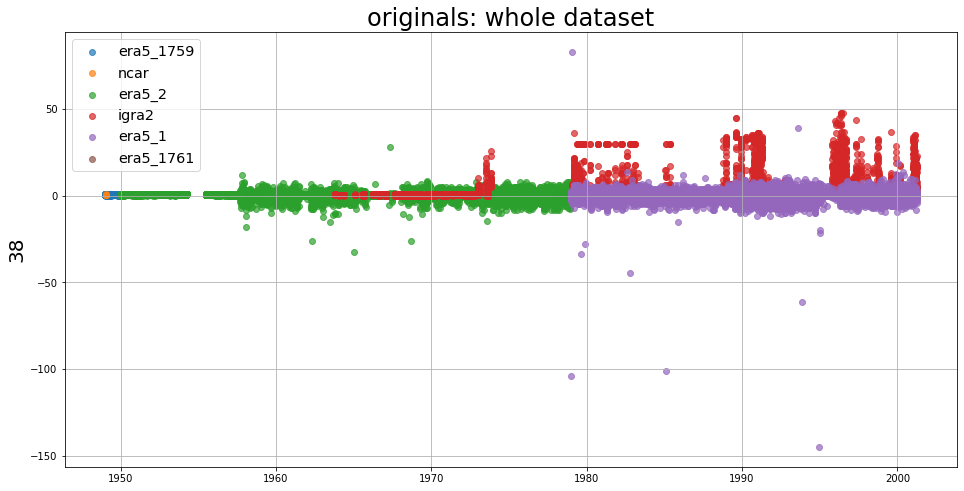

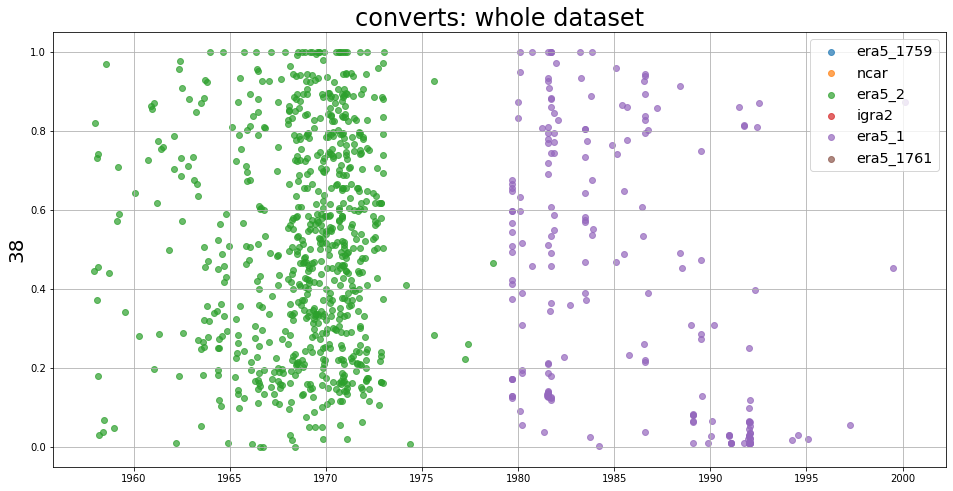

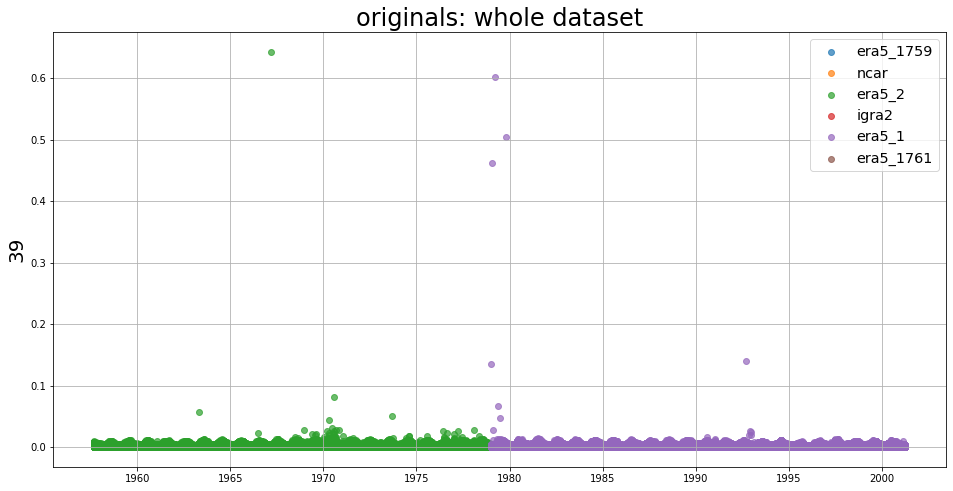

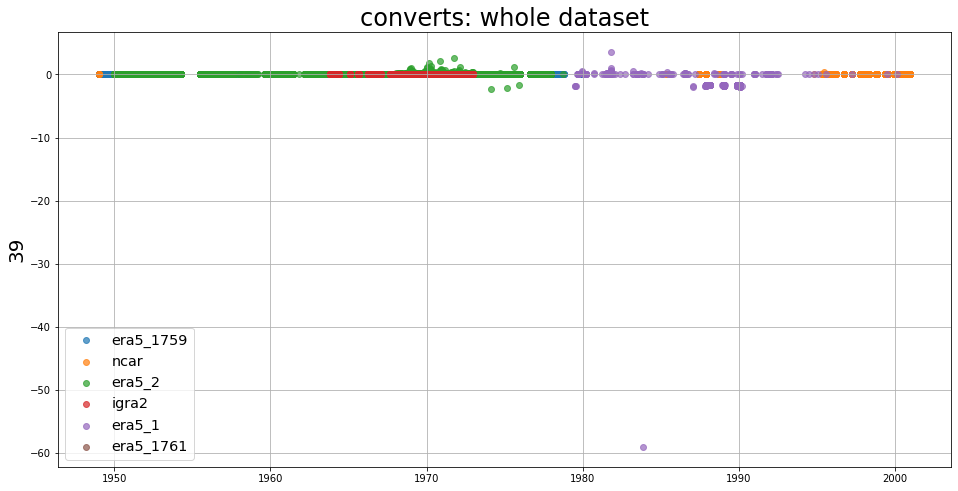

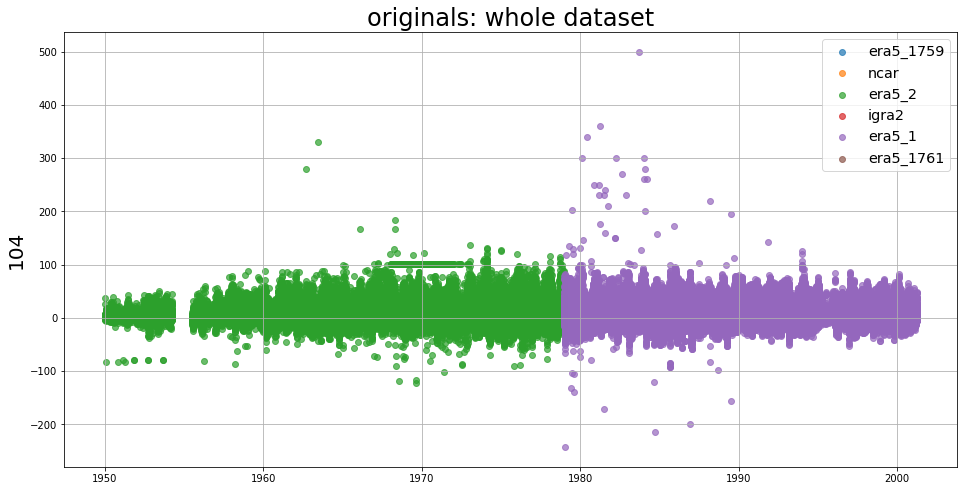

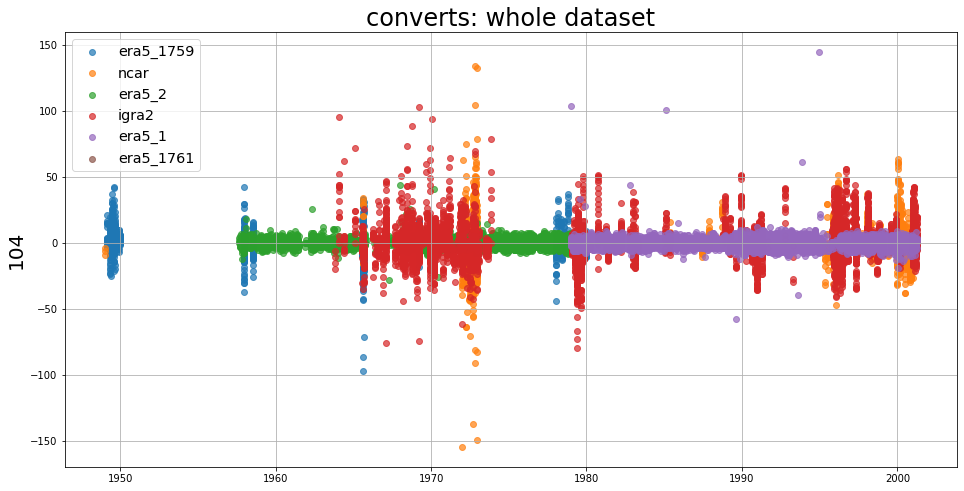

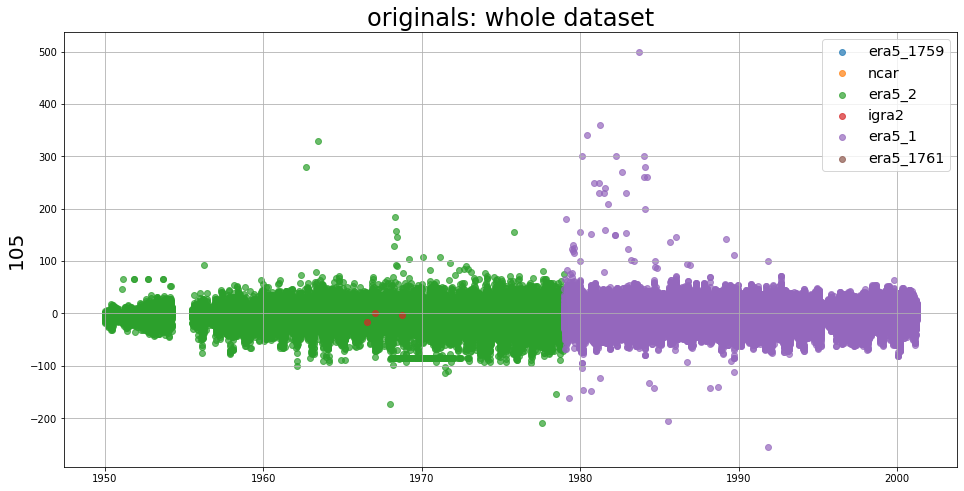

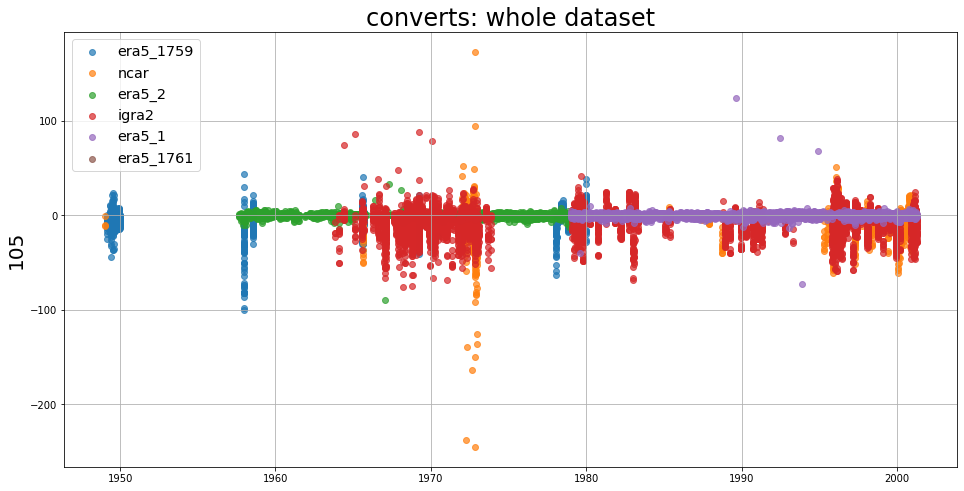

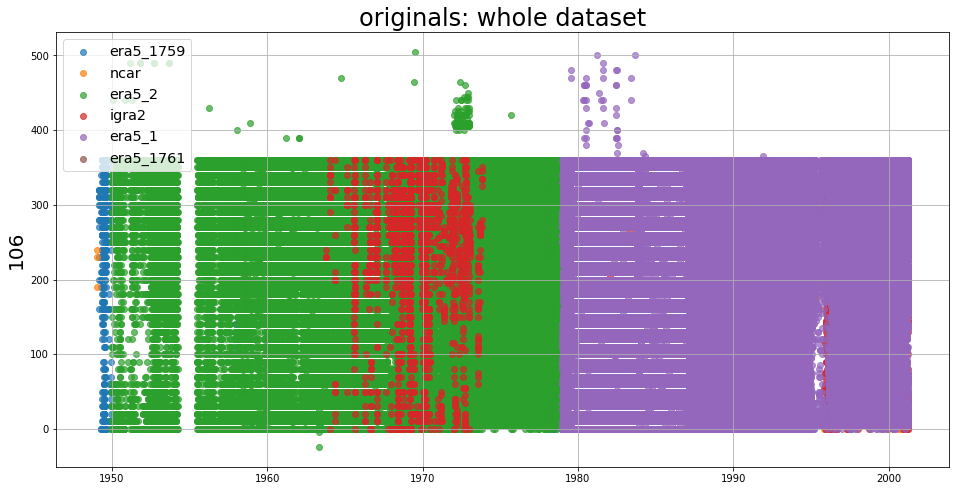

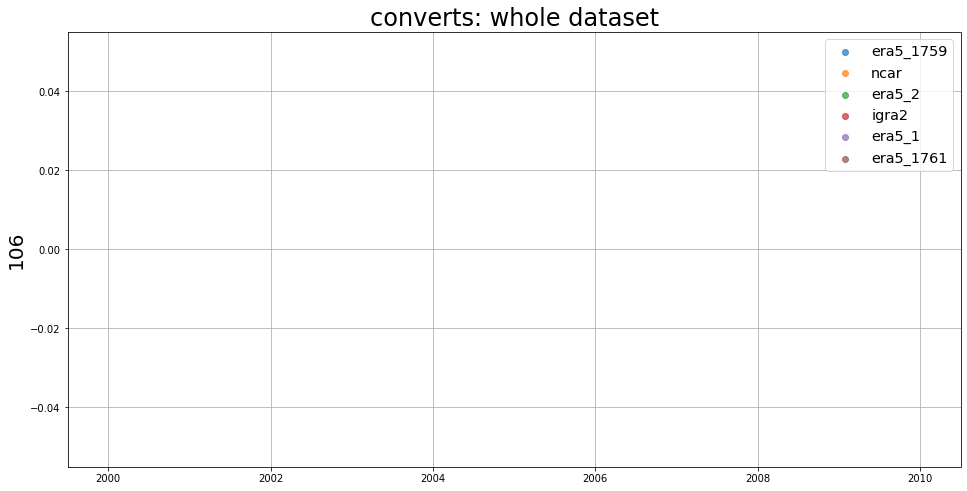

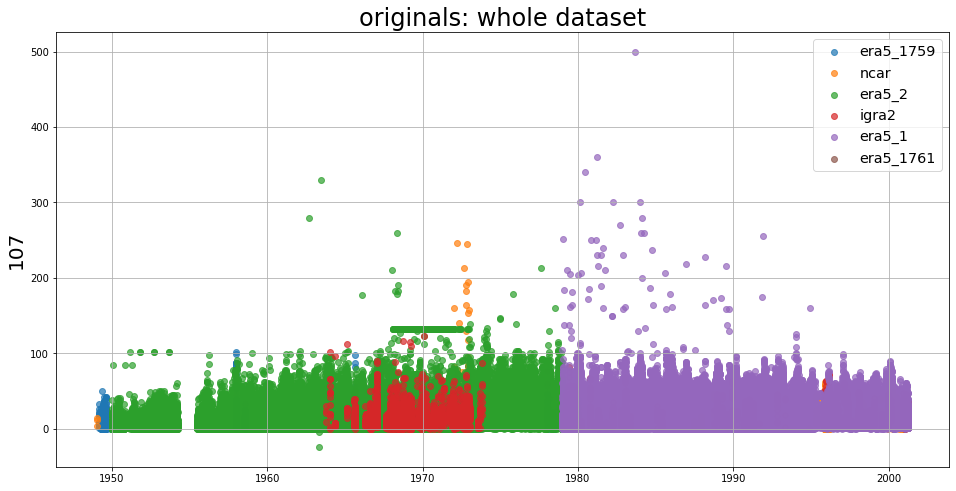

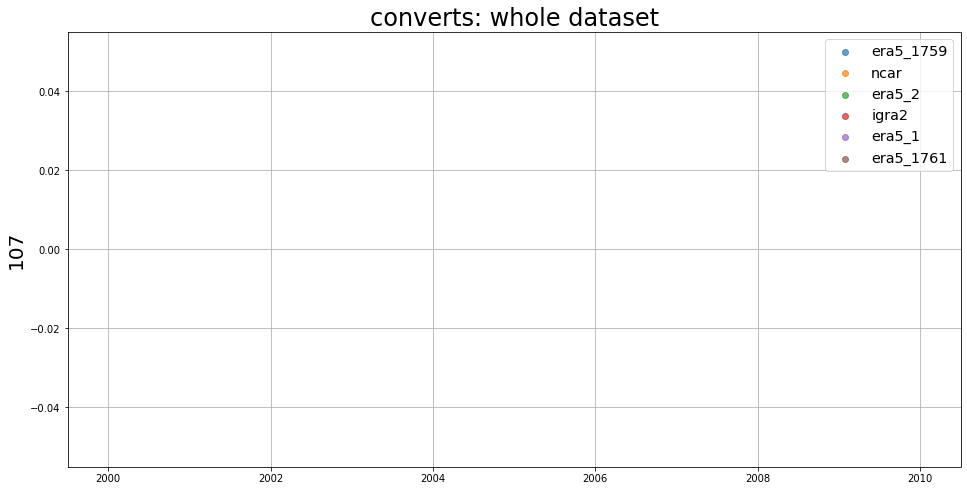

In [6]:
converted_era5_1759 = aa[aa.conversion_flag == 0][aa.source_id == 'era5_1759']
converted_ncar = aa[aa.conversion_flag == 0][aa.source_id == 'ncar']
converted_era5_2 = aa[aa.conversion_flag == 0][aa.source_id == 'era5_2']
converted_igra2 = aa[aa.conversion_flag == 0][aa.source_id == 'igra2']
converted_era5_1 = aa[aa.conversion_flag == 0][aa.source_id == 'era5_1']
converted_era5_1761 = aa[aa.conversion_flag == 0][aa.source_id == 'era5_1761']

original_era5_1759 = aa[aa.conversion_flag != 0][aa.source_id == 'era5_1759']
original_ncar = aa[aa.conversion_flag != 0][aa.source_id == 'ncar']
original_era5_2 = aa[aa.conversion_flag != 0][aa.source_id == 'era5_2']
original_igra2 = aa[aa.conversion_flag != 0][aa.source_id == 'igra2']
original_era5_1 = aa[aa.conversion_flag != 0][aa.source_id == 'era5_1']
original_era5_1761 = aa[aa.conversion_flag != 0][aa.source_id == 'era5_1761']


originals = [original_era5_1759, original_ncar, original_era5_2, original_igra2, original_era5_1, original_era5_1761]
converts = [converted_era5_1759, converted_ncar, converted_era5_2, converted_igra2, converted_era5_1, converted_era5_1761]
varlist = [34,36,38,39,104,105,106,107]
names = ['era5_1759', 'ncar', 'era5_2', 'igra2', 'era5_1', 'era5_1761']
for i in varlist:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    for o in range(len(originals)):
        data = originals[o][originals[o].observed_variable == i]
        ax1.scatter(data['date_time'], data['observation_value'], label = names[o], alpha=0.7)
    ax1.set(ylabel=i, title='originals: whole dataset')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    for o in range(len(converts)):
        data = converts[o][converts[o].observed_variable == i]
        ax1.scatter(data['date_time'], data['observation_value'], label = names[o], alpha=0.7)
    ax1.set(ylabel=i, title='converts: whole dataset')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)


# specific humidity:

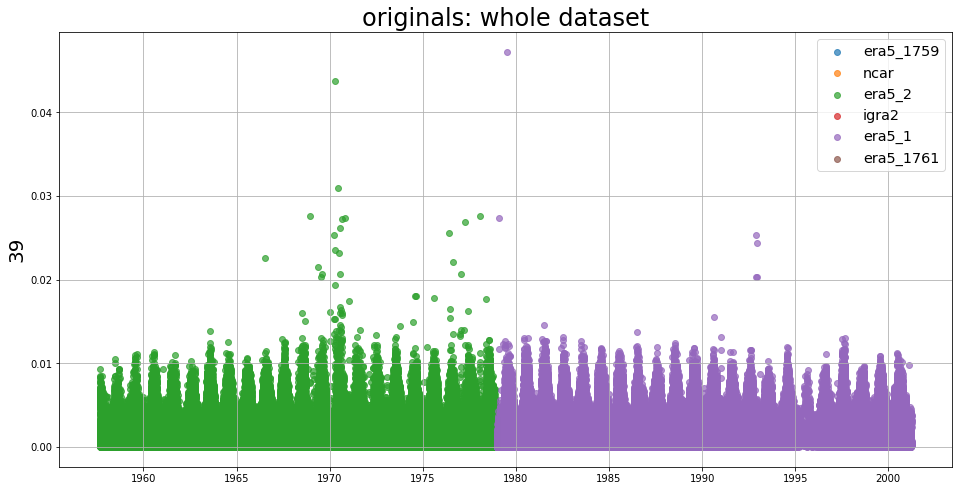

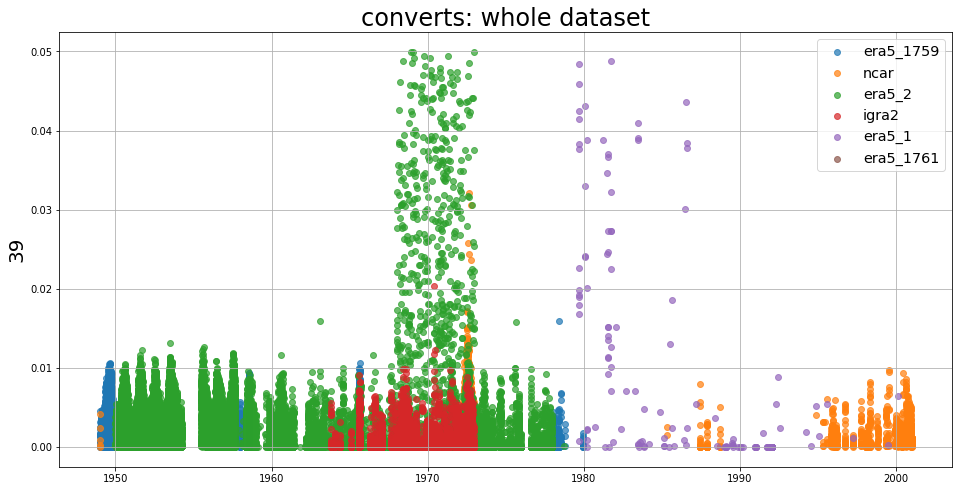

In [7]:
varlist = [39]
names = ['era5_1759', 'ncar', 'era5_2', 'igra2', 'era5_1', 'era5_1761']
for i in varlist:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    for o in range(len(originals)):
        data = originals[o][originals[o].observed_variable == i][originals[o].observation_value < 0.05][originals[o].observation_value > -0.01]
        ax1.scatter(data['date_time'], data['observation_value'], label = names[o], alpha=0.7)
    ax1.set(ylabel=i, title='originals: whole dataset')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    for o in range(len(converts)):
        data = converts[o][converts[o].observed_variable == i][converts[o].observation_value < 0.05][converts[o].observation_value > -0.01]
        ax1.scatter(data['date_time'], data['observation_value'], label = names[o], alpha=0.7)
    ax1.set(ylabel=i, title='converts: whole dataset')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)


# relative humidity:

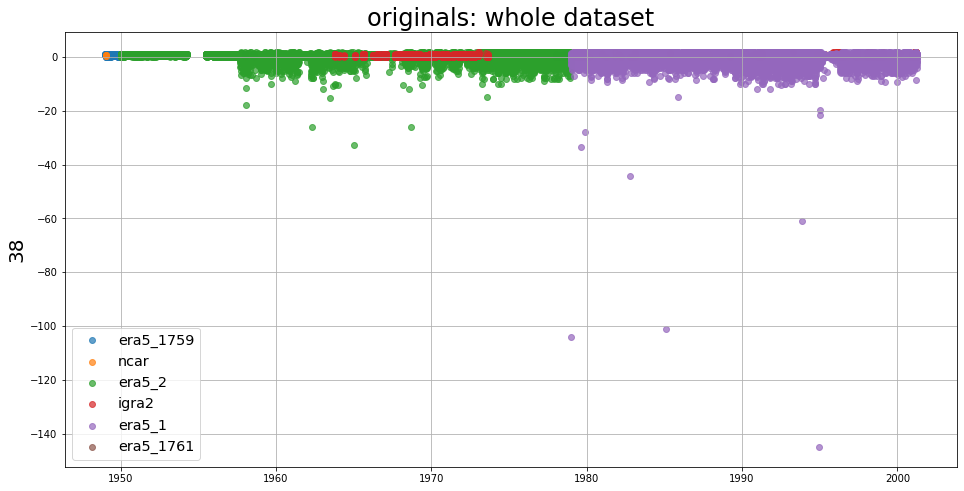

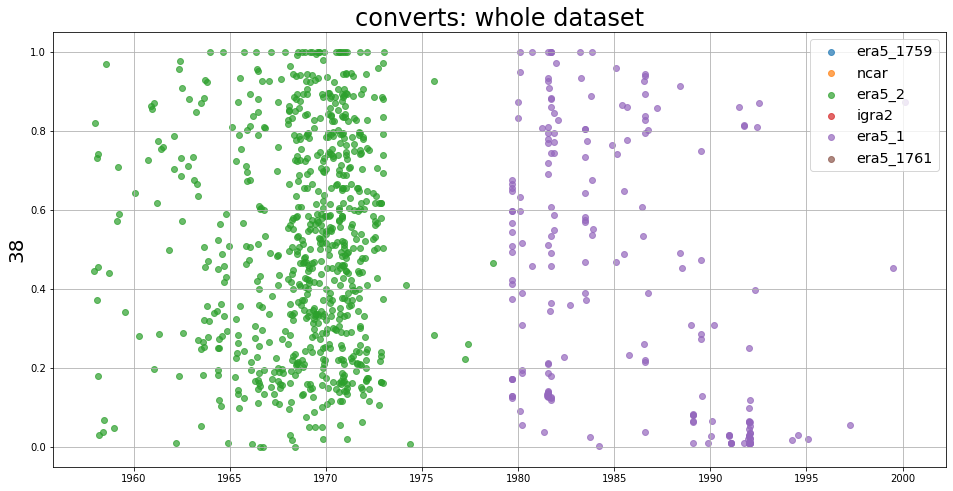

In [8]:
varlist = [38]
names = ['era5_1759', 'ncar', 'era5_2', 'igra2', 'era5_1', 'era5_1761']
for i in varlist:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    for o in range(len(originals)):
        data = originals[o][originals[o].observed_variable == i][originals[o].observation_value < 2]
        ax1.scatter(data['date_time'], data['observation_value'], label = names[o], alpha=0.7)
    ax1.set(ylabel=i, title='originals: whole dataset')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    for o in range(len(converts)):
        data = converts[o][converts[o].observed_variable == i][converts[o].observation_value < 2]
        ax1.scatter(data['date_time'], data['observation_value'], label = names[o], alpha=0.7)
    ax1.set(ylabel=i, title='converts: whole dataset')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

# humidity

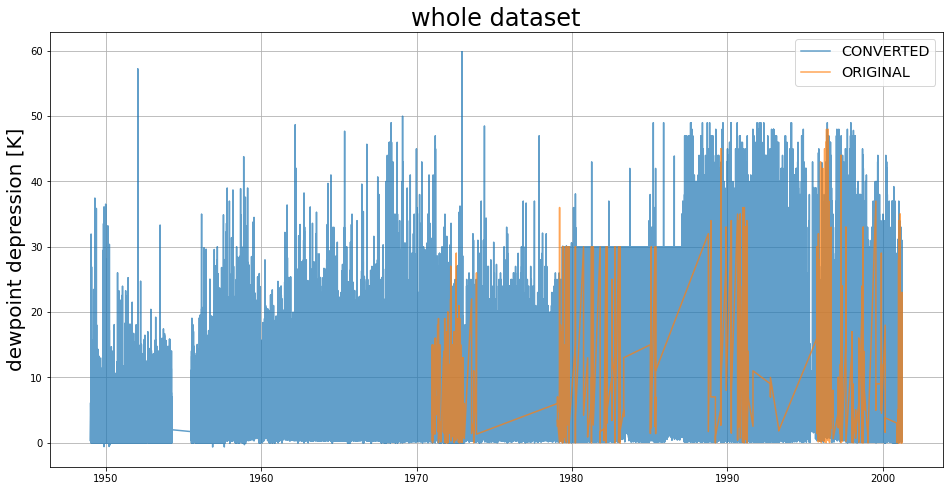

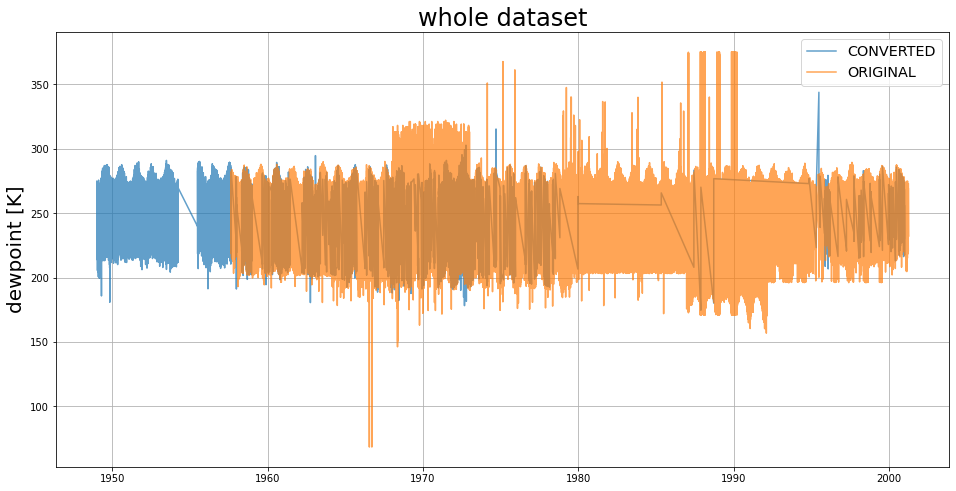

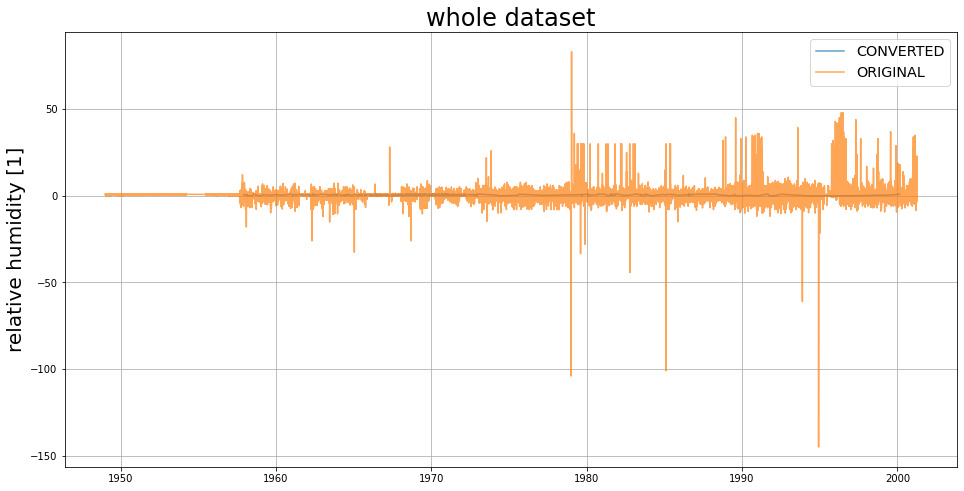

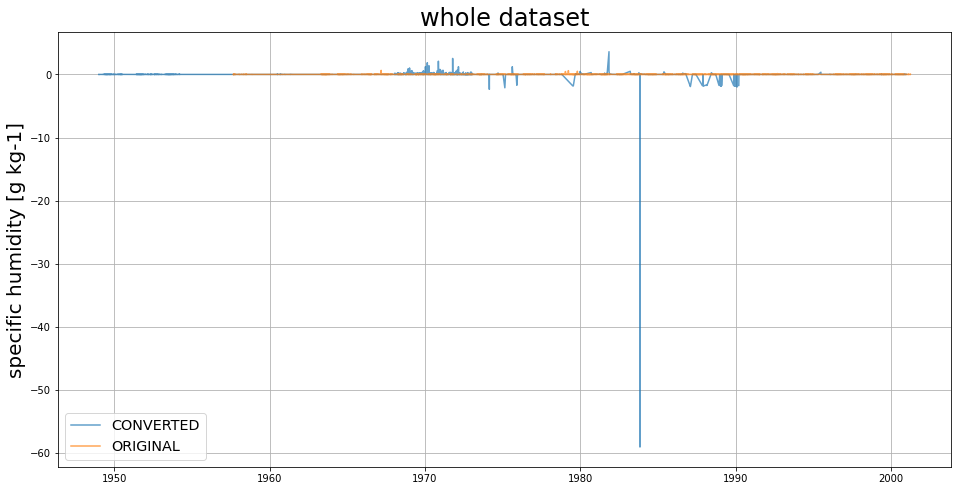

In [9]:
converted = aa[aa.observed_variable == 34][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 34][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='dewpoint depression [K]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 36][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 36][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='dewpoint [K]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 38][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 38][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='relative humidity [1]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 39][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 39][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='specific humidity [g kg-1]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

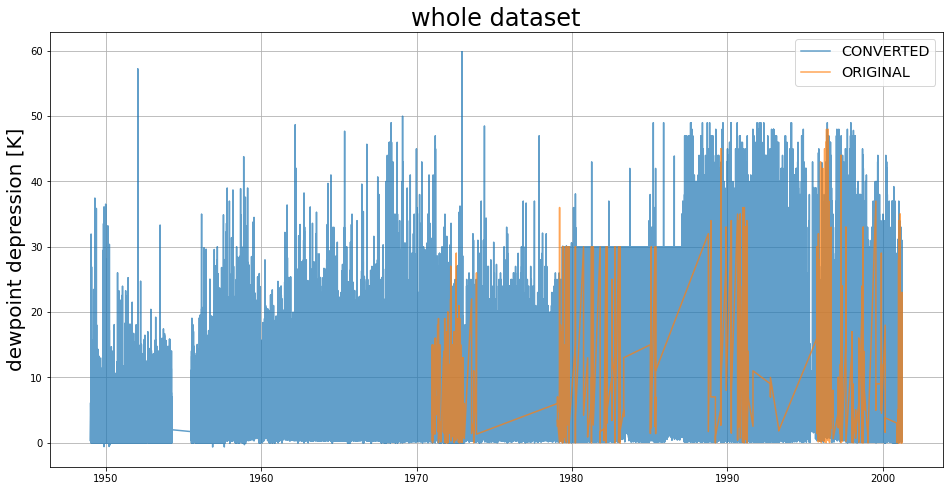

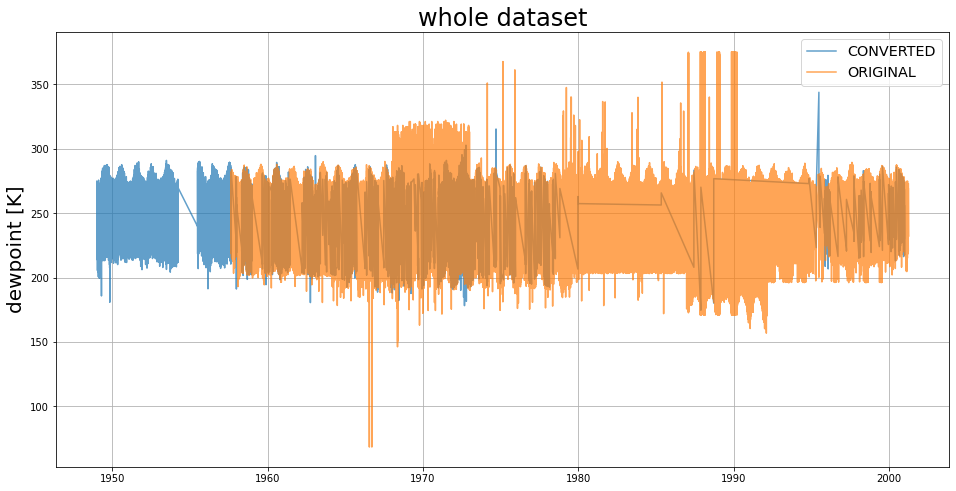

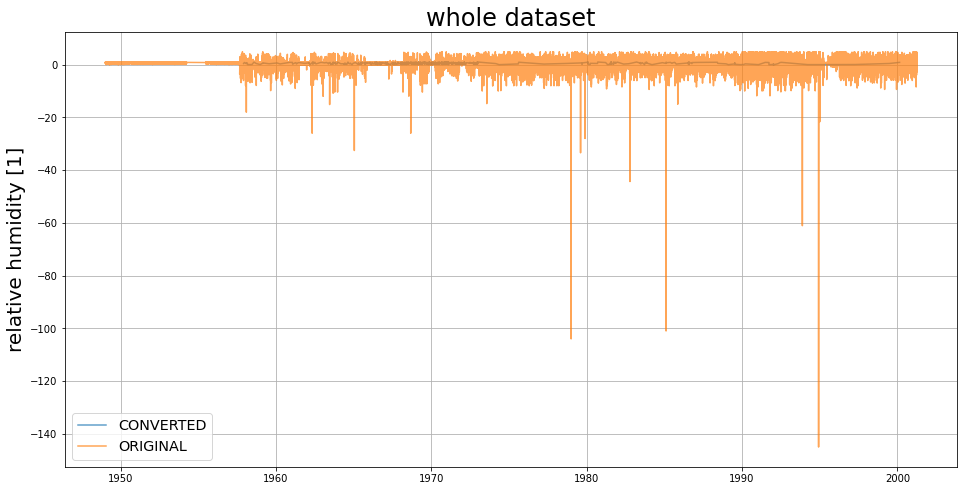

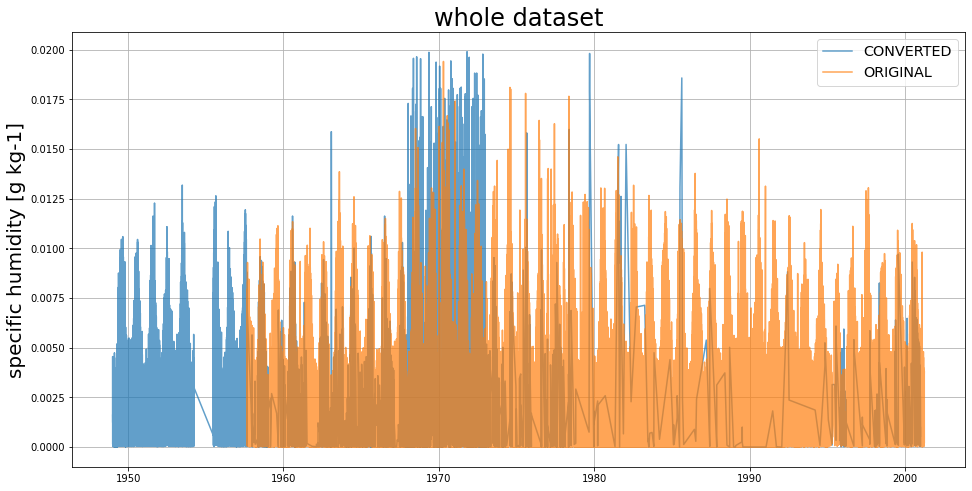

In [10]:
converted = aa[aa.observed_variable == 34][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 34][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='dewpoint depression [K]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 36][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 36][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='dewpoint [K]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 38][aa.conversion_flag == 0][aa.observation_value < 5]
original = aa[aa.observed_variable == 38][aa.conversion_flag != 0][aa.observation_value < 5]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='relative humidity [1]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 39][aa.conversion_flag == 0][aa.observation_value < 0.02][aa.observation_value > -0.02]
original = aa[aa.observed_variable == 39][aa.conversion_flag != 0][aa.observation_value < 0.02]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='specific humidity [g kg-1]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

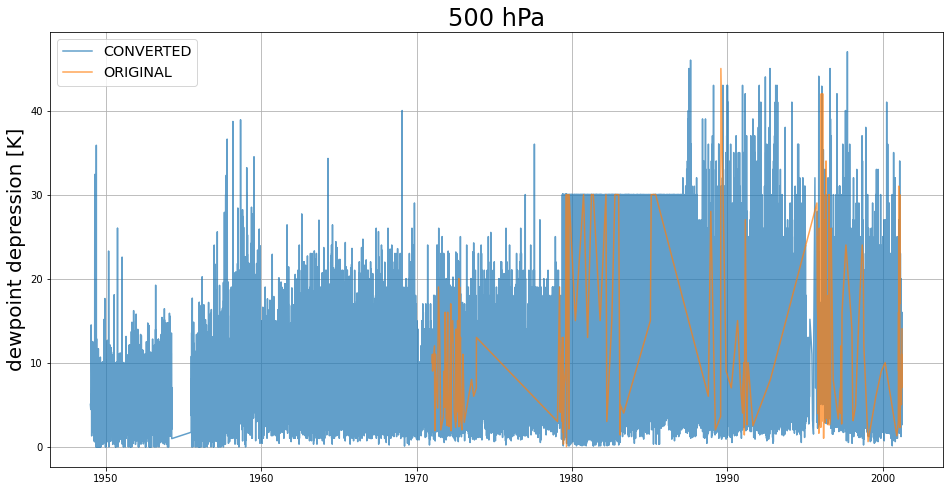

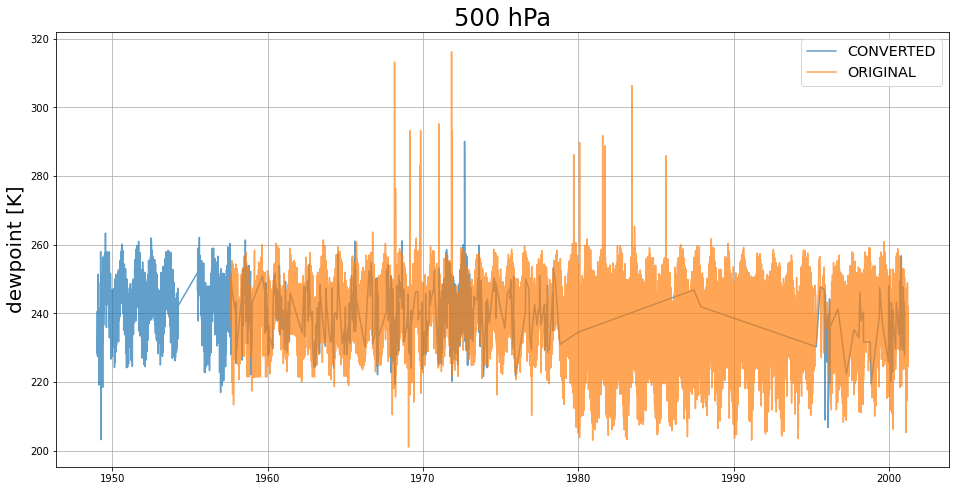

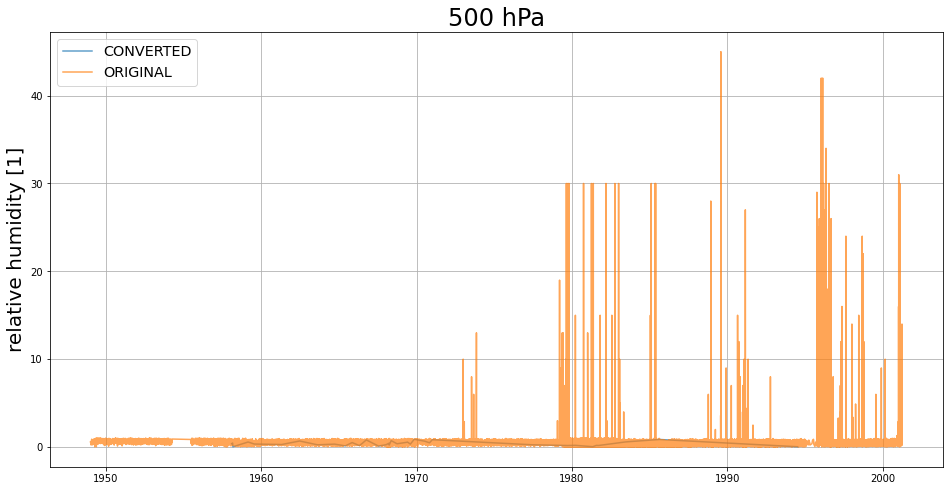

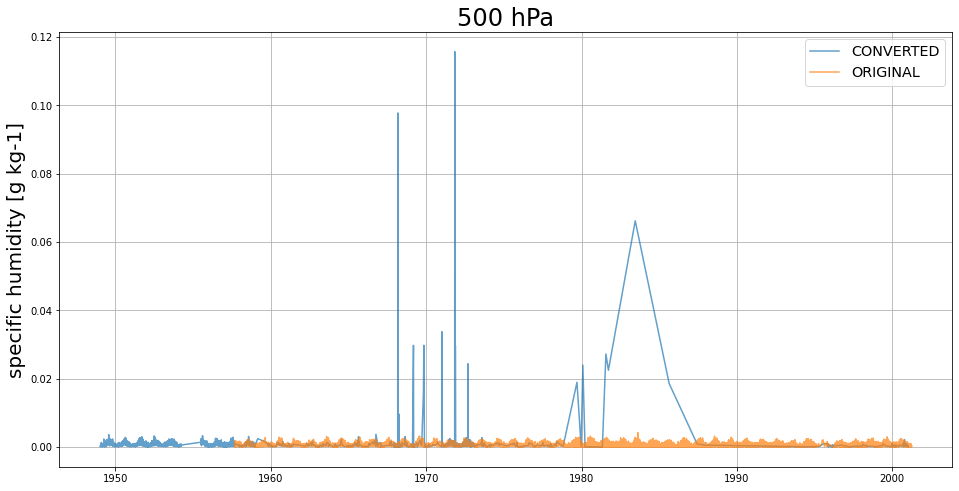

In [11]:
converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 34][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 34][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='dewpoint depression [K]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 36][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 36][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='dewpoint [K]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 38][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 38][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='relative humidity [1]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 39][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 39][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='specific humidity [g kg-1]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

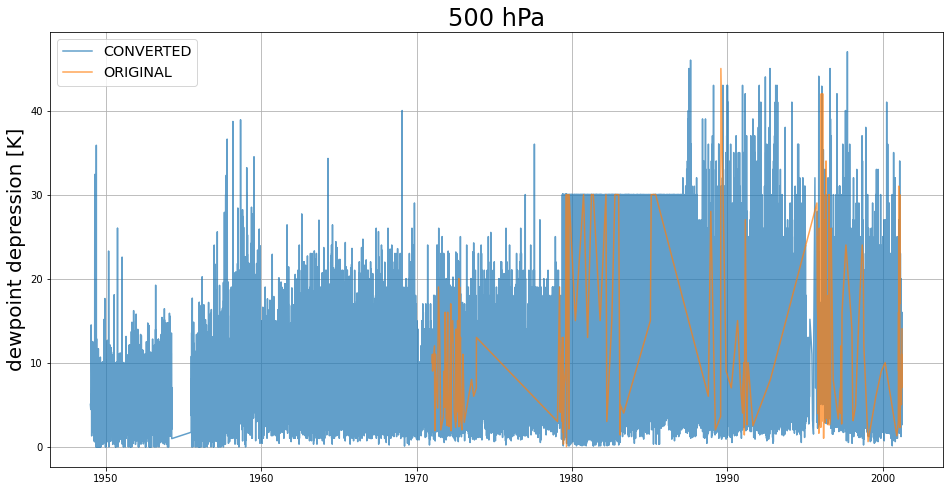

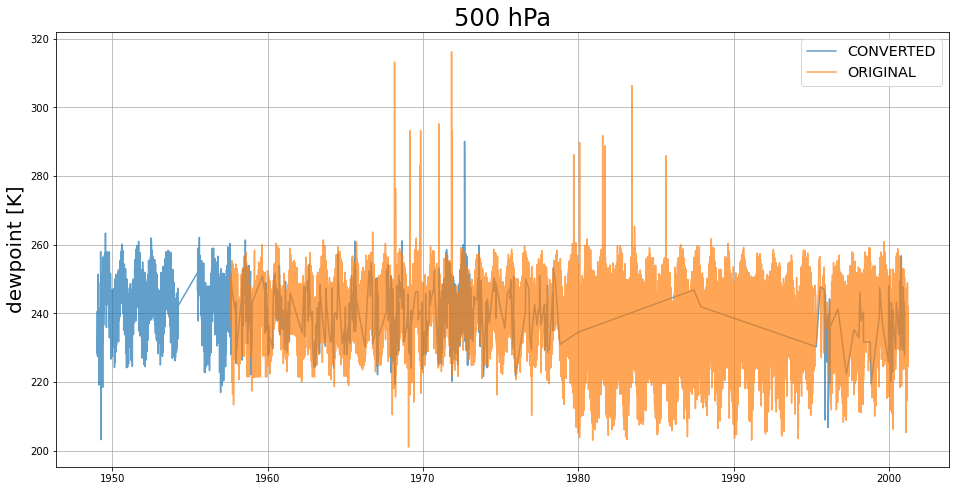

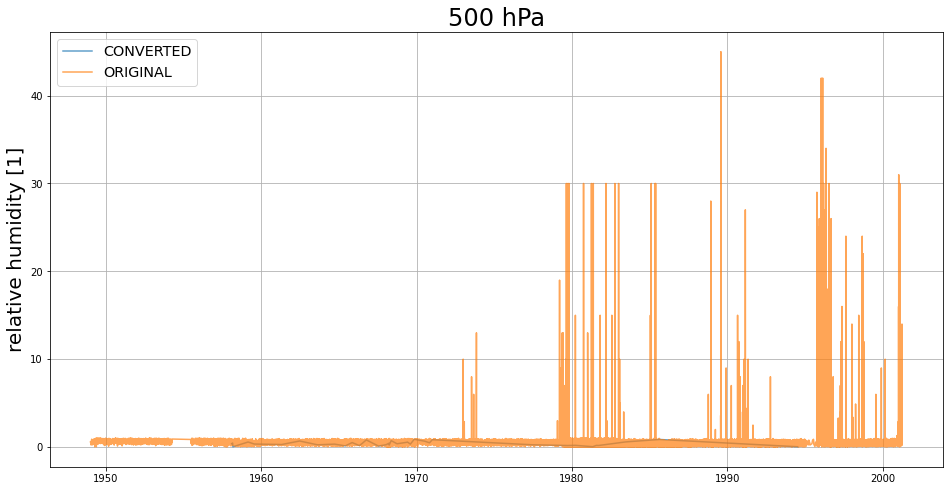

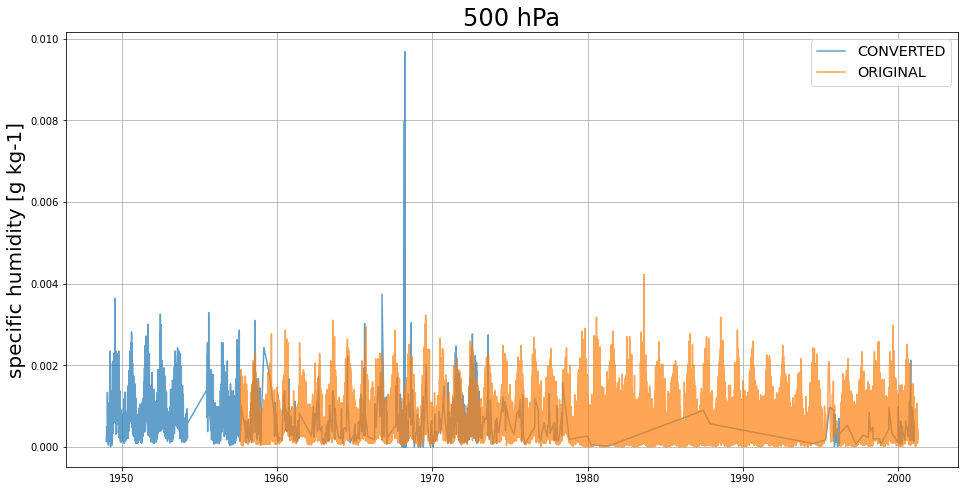

In [12]:
converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 34][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 34][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='dewpoint depression [K]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 36][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 36][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='dewpoint [K]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 38][aa.conversion_flag == 0][aa.observation_value < 5]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 38][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='relative humidity [1]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 39][aa.conversion_flag == 0][aa.observation_value < 0.01]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 39][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='specific humidity [g kg-1]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

---
---

# wind

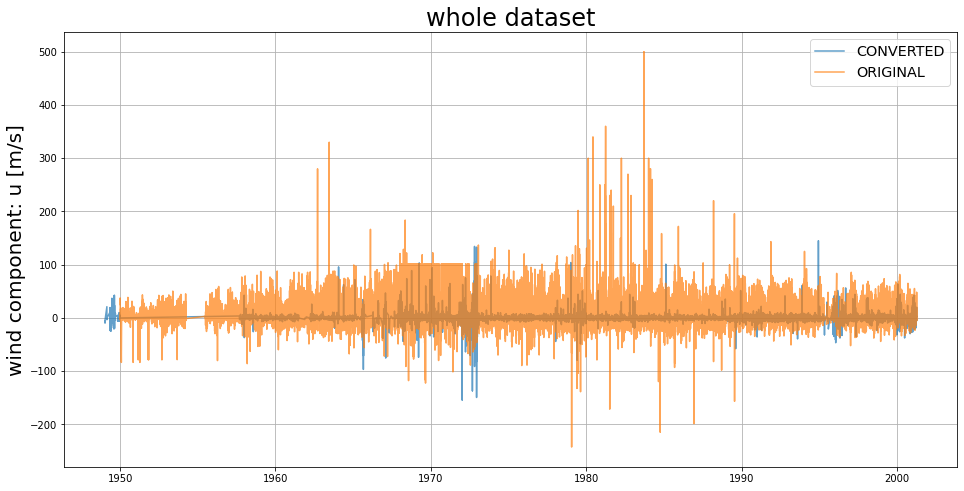

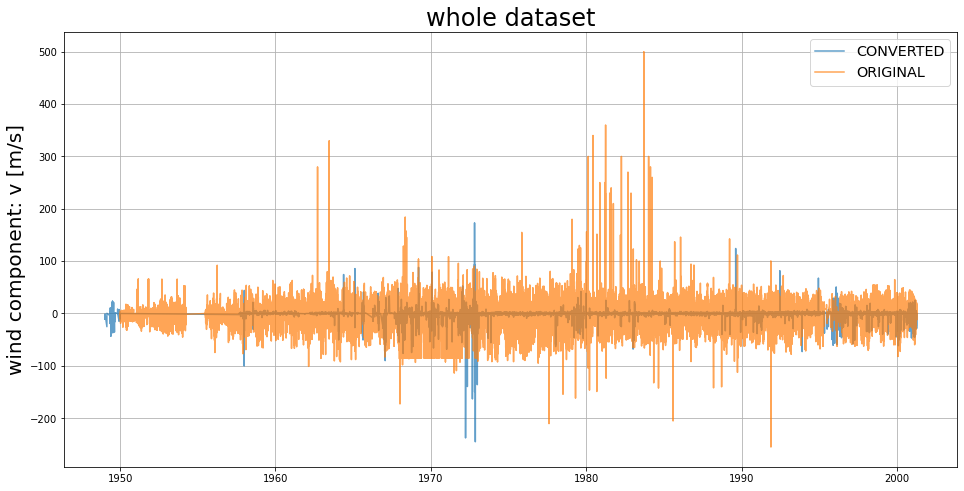

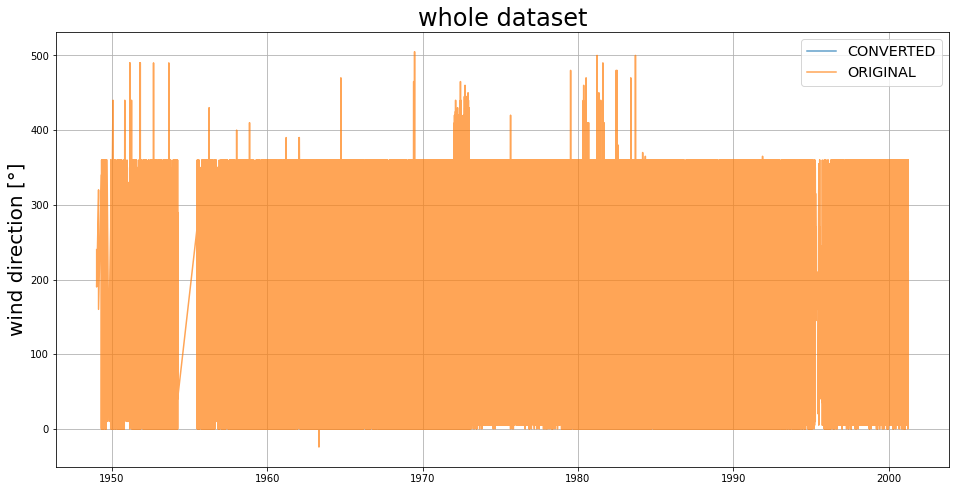

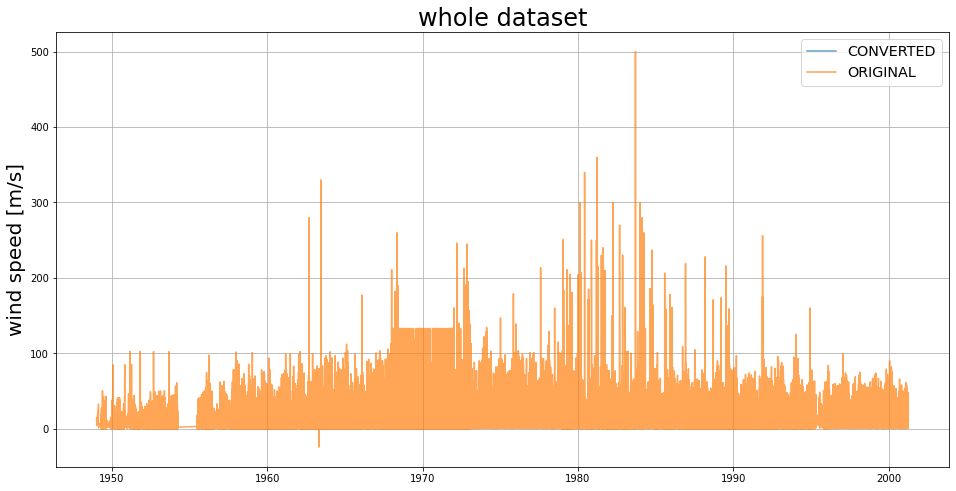

In [13]:
converted = aa[aa.observed_variable == 104][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 104][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='wind component: u [m/s]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 105][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 105][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='wind component: v [m/s]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 106][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 106][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='wind direction [°]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 107][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 107][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='wind speed [m/s]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

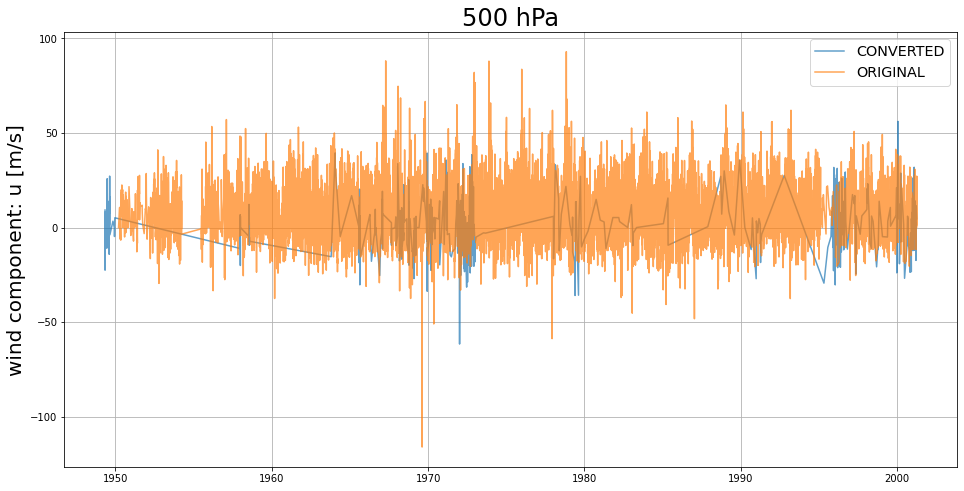

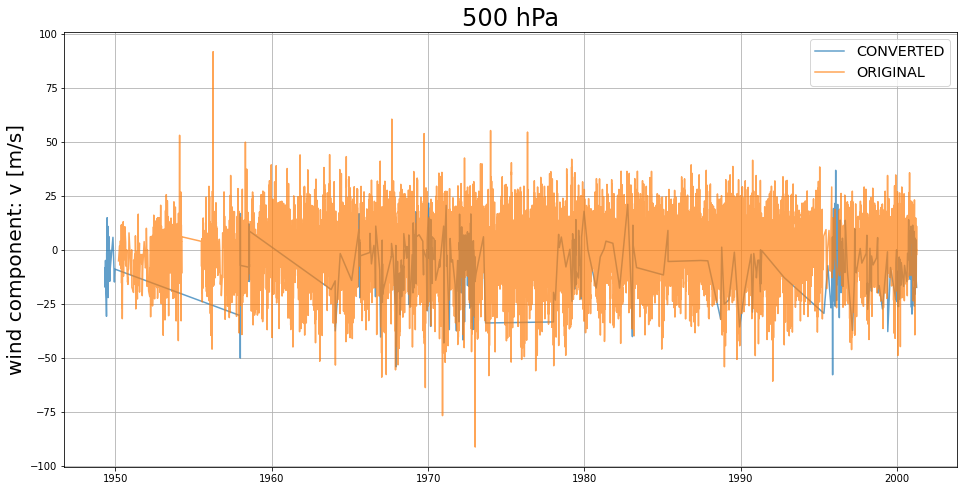

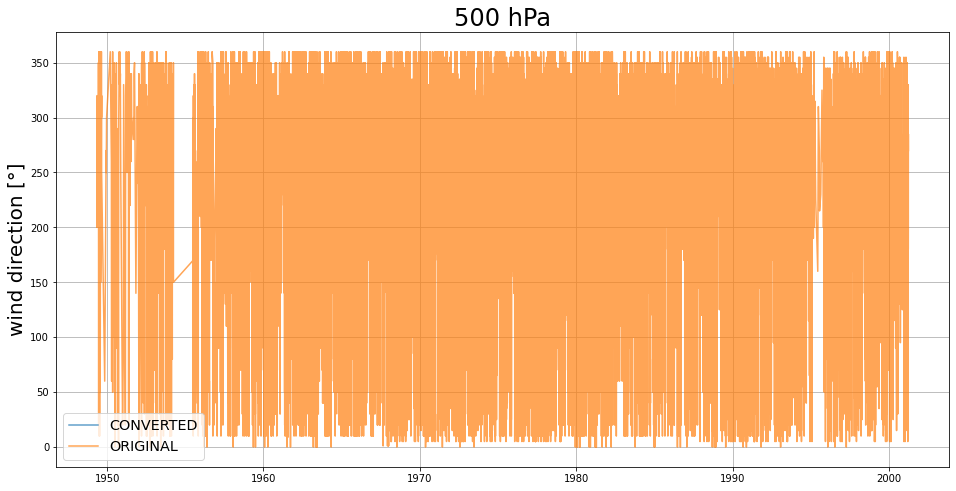

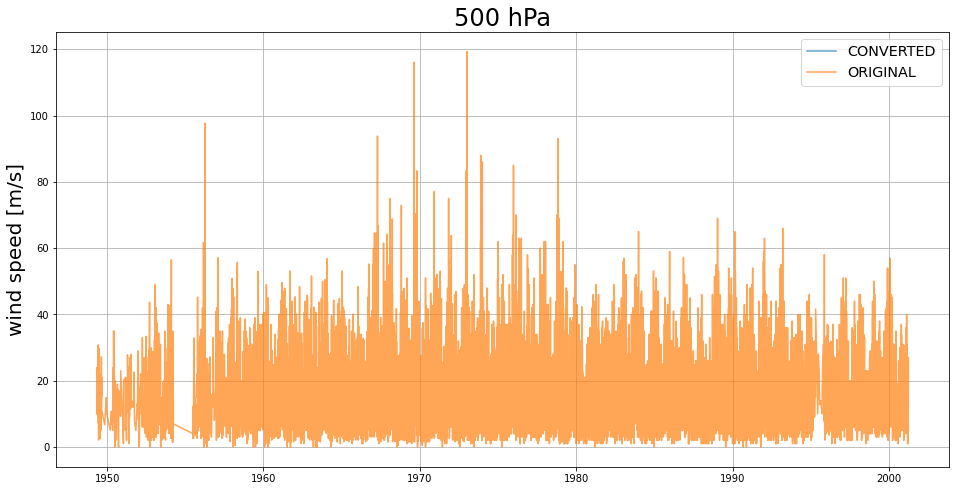

In [14]:
converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 104][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 104][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='wind component: u [m/s]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 105][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 105][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='wind component: v [m/s]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 106][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 106][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='wind direction [°]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 107][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 107][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='wind speed [m/s]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)